In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('D:/Gritfeat/Python/replace/replace.csv')
df.head(20)

,Unnamed: 0,age,category,gender
0,0,22.0,スポーツ_健康飲料,男性
1,1,26.0,栄養ドリンク,男性
2,2,26.0,栄養ドリンク,男性
3,3,18.0,スポーツ_健康飲料,男性
4,4,31.0,栄養ドリンク,男性
5,5,31.0,ミネラルウォーター,男性
6,6,28.0,栄養ドリンク,女性
7,7,32.0,日本茶,男性
8,8,55.0,栄養ドリンク,女性
9,9,21.0,carbonated_soda,男性


In [28]:
df['age'].isna().sum()

124909

In [29]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [30]:
df['age'].isna().sum()

0

In [31]:
age_bins = [0, 18, 26, 40, 60, 110]
age_labels = ['<=18', '19-26', '27-40', '41-60', '>60']

df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

df


,Unnamed: 0,age,category,gender,Age_Group
0,0,22.0,スポーツ_健康飲料,男性,19-26
1,1,26.0,栄養ドリンク,男性,19-26
2,2,26.0,栄養ドリンク,男性,19-26
3,3,18.0,スポーツ_健康飲料,男性,<=18
4,4,31.0,栄養ドリンク,男性,27-40
...,...,...,...,...,...
3560826,3560826,55.0,ミネラルウォーター,女性,41-60
3560827,3560827,49.0,スポーツ_健康飲料,男性,41-60
3560828,3560828,13.0,その他,男性,<=18
3560829,3560829,13.0,その他,男性,<=18


In [32]:
from googletrans import Translator
translator = Translator()

In [33]:
unique_categories = df['category'].unique()

In [34]:
unique_categories

array(['スポーツ_健康飲料', '栄養ドリンク', 'ミネラルウォーター', '日本茶', 'carbonated_soda',
       'コーヒー', '乳飲料', '果汁飲料', '紅茶', '炭酸水', 'unknown', 'その他', '炭酸ジュース',
       nan], dtype=object)

In [35]:
translated_categories_en = []

for category in unique_categories:
    translation = translator.translate(category, src='ja', dest='en')
    translated_categories_en.append(translation.text)

In [36]:
translated_categories_en

['Sports _ Health drink',
 'Nutrition Drink',
 'Mineral water',
 'Japanese tea',
 'carbonated_soda',
 'coffee',
 'milk beverage',
 'Juice drink',
 'Black tea',
 'Carbonated water',
 'unknown',
 'others',
 'Carbonated juice',
 'Nan']

In [37]:
df['Category'] = df['category'].replace(unique_categories, translated_categories_en)
df

,Unnamed: 0,age,category,gender,Age_Group,Category
0,0,22.0,スポーツ_健康飲料,男性,19-26,Sports _ Health drink
1,1,26.0,栄養ドリンク,男性,19-26,Nutrition Drink
2,2,26.0,栄養ドリンク,男性,19-26,Nutrition Drink
3,3,18.0,スポーツ_健康飲料,男性,<=18,Sports _ Health drink
4,4,31.0,栄養ドリンク,男性,27-40,Nutrition Drink
...,...,...,...,...,...,...
3560826,3560826,55.0,ミネラルウォーター,女性,41-60,Mineral water
3560827,3560827,49.0,スポーツ_健康飲料,男性,41-60,Sports _ Health drink
3560828,3560828,13.0,その他,男性,<=18,others
3560829,3560829,13.0,その他,男性,<=18,others


In [38]:
unique_gender = df['gender'].unique()

In [39]:
unique_gender

array(['男性', '女性', '不明'], dtype=object)

In [40]:
translated_gender_en = []

for gender in unique_gender:
    translation = translator.translate(gender, src='ja', dest='en')
    translated_gender_en.append(translation.text)

In [41]:
translated_gender_en

['male', 'woman', 'not clear']

In [42]:
df['Gender'] = df['gender'].replace(unique_gender, translated_gender_en)

In [43]:
df.head(20)

,Unnamed: 0,age,category,gender,Age_Group,Category,Gender
0,0,22.0,スポーツ_健康飲料,男性,19-26,Sports _ Health drink,male
1,1,26.0,栄養ドリンク,男性,19-26,Nutrition Drink,male
2,2,26.0,栄養ドリンク,男性,19-26,Nutrition Drink,male
3,3,18.0,スポーツ_健康飲料,男性,<=18,Sports _ Health drink,male
4,4,31.0,栄養ドリンク,男性,27-40,Nutrition Drink,male
5,5,31.0,ミネラルウォーター,男性,27-40,Mineral water,male
6,6,28.0,栄養ドリンク,女性,27-40,Nutrition Drink,woman
7,7,32.0,日本茶,男性,27-40,Japanese tea,male
8,8,55.0,栄養ドリンク,女性,41-60,Nutrition Drink,woman
9,9,21.0,carbonated_soda,男性,19-26,carbonated_soda,male


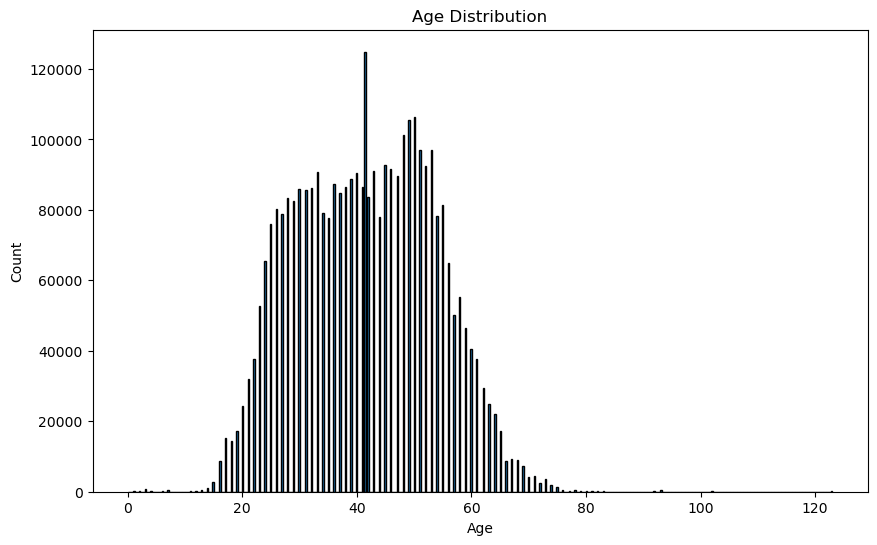

In [44]:
# plt.hist(df['age'], bins=age_bins, edgecolor = 'black')

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=500, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()